In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

In [4]:
# Read the City and Ride Data
cd = pd.read_csv(city_data_to_load)
rd = pd.read_csv(ride_data_to_load)
cd.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [5]:
rd.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [6]:
# Combine the data into a single dataset
crd = pd.merge(cd, rd, how ="outer", on ="city")

# Display the data table for preview
crd.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [7]:
crd["type"].value_counts()

Urban       1625
Suburban     625
Rural        125
Name: type, dtype: int64

In [8]:
#create separate dataframes for each city type
uc = crd.loc[(crd["type"]=="Urban")]
sbb = crd.loc[(crd["type"]=="Suburban")]
rur = crd.loc[(crd["type"]=="Rural")]

In [9]:
type(uc)

pandas.core.frame.DataFrame

In [10]:
#calculate avg fare for each city
avg_fare_uc = uc.groupby(["city"])["fare"].mean()
avg_fare_sbb = sbb.groupby(["city"])["fare"].mean()
avg_fare_rur = rur.groupby(["city"])["fare"].mean()

total_rides_uc= uc.groupby(['city']).count()['ride_id']
total_rides_sbb= sbb.groupby(['city']).count()['ride_id']
total_rides_rur= rur.groupby(['city']).count()['ride_id']

total_drivers_uc = uc.groupby(["city"])["driver_count"].value_counts()
total_drivers_sbb = sbb.groupby(["city"])["driver_count"].value_counts()
total_drivers_rur = rur.groupby(["city"])["driver_count"].value_counts()

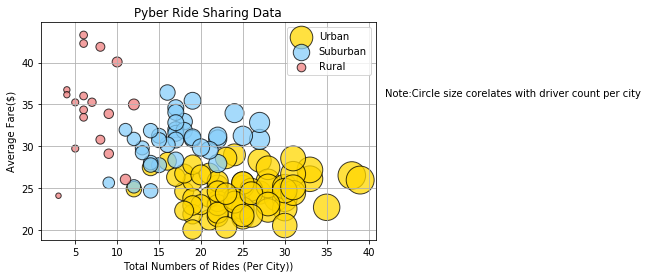

In [11]:
# Obtain the x and y coordinates for each of the three city types
plt.scatter(total_rides_uc, avg_fare_uc,s=total_drivers_uc*20,
            marker ='o', facecolors ="Gold", edgecolors='black',alpha = 0.75, label="Urban")

plt.scatter(total_rides_sbb, avg_fare_sbb,s=total_drivers_sbb*15,
            marker ='o', facecolors ="Lightskyblue", edgecolors='black',alpha = 0.75, label="Suburban")

plt.scatter(total_rides_rur, avg_fare_rur,s=total_drivers_rur*10,
            marker ='o', facecolors ="LightCoral", edgecolors='black',alpha = 0.75, label="Rural")
# Chart title
plt.title("Pyber Ride Sharing Data")
# x label
plt.xlabel("Total Numbers of Rides (Per City))")
# y label
plt.ylabel("Average Fare($)")
# legend 
plt.legend(loc="upper right")
plt.grid()

# plt.text(0.5, 0.5,'Note: Circle size corelates with driver count per city',
#                          horizontalalignment='center',verticalalignment='center',transform = ax.transAxes)
_ = plt.text(42,36, "Note:Circle size corelates with driver count per city", fontsize=10)

#plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",
            #s=x_axis, alpha=0.75)

In [12]:
#Save an image of the chart and print to screen
plt.savefig("Images/Pyber Ride Sharing.png")
plt.show()

<Figure size 432x288 with 0 Axes>

In [13]:
 #Total Fares by City Type
#Calculate Total Fare by City Type
total_fare = crd.groupby(['type'])['fare'].sum()

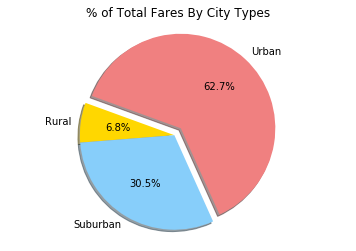

In [14]:
# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]
# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Fares By City Types")
plt.pie(total_fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=160)
plt.axis("equal")
plt.savefig("Images/% of Total Fares By City Types.png")
plt.show()

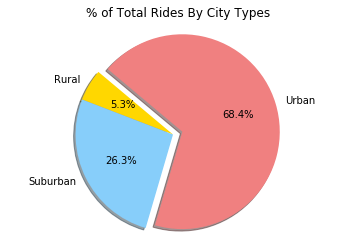

In [15]:
#Total Rides by City Type
# Calculate Total Fare by City Type
total_rides = crd.groupby(['type'])['ride_id'].count()
# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]
# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Rides By City Types")
plt.pie(total_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.savefig("Images/% of Total Rides By City Types.png")
plt.show()

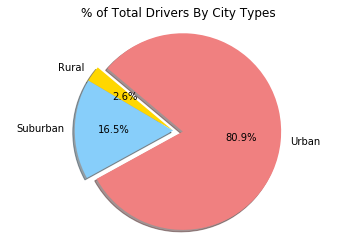

In [16]:
#Total Drivers by City Type
# Calculate Total Drivers by City Type
total_drivers = cd.groupby(['type'])['driver_count'].sum()
# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]
# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Drivers By City Types")
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.savefig("Images/% of Total Drivers By City Types.png")
plt.show()